# Exploratory Data Analysis

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

%config InlineBackend.figure_format = 'svg'

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#numerical = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
numerical

['Age', 'Fare', 'SibSp', 'Parch']

In [10]:
#categorical = data.select_dtypes(include = ['object']).columns.tolist()
categorical = ['Sex', 'Cabin', 'Embarked', 'Pclass']
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

## Numerical Features

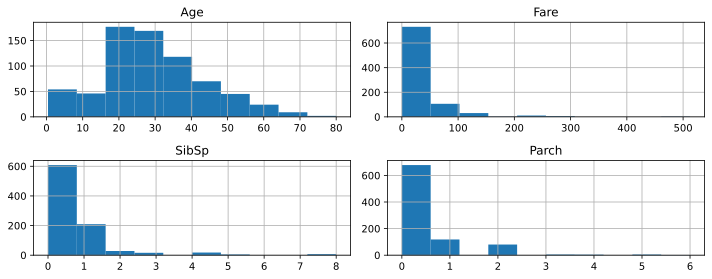

In [11]:
data[numerical].hist(figsize = (10,4))
plt.tight_layout()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

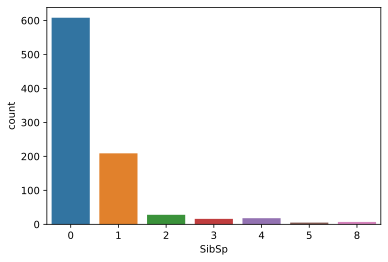

In [12]:
sns.countplot(x = data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

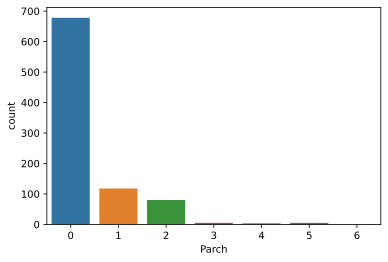

In [13]:
sns.countplot(x = data['Parch'])

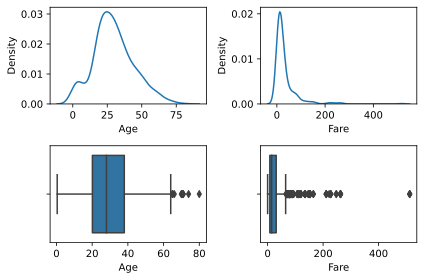

In [14]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['Age'], ax = ax[0,0])
sns.kdeplot(data['Fare'], ax = ax[0,1])
sns.boxplot(x = data['Age'], ax = ax[1,0])
sns.boxplot(x = data['Fare'], ax = ax[1,1])

plt.tight_layout()

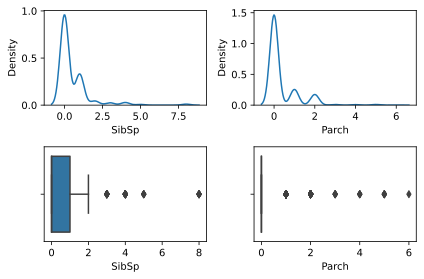

In [15]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['SibSp'], ax = ax[0,0])
sns.kdeplot(data['Parch'], ax = ax[0,1])
sns.boxplot(x = data['SibSp'], ax = ax[1,0])
sns.boxplot(x = data['Parch'], ax = ax[1,1])

plt.tight_layout()

In [16]:
for feature in [ 'Pclass', 'Parch', 'SibSp']:
    print(feature)
    print(data[feature].value_counts())

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


## Categorical Features

In [17]:
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

In [18]:
for feature in categorical:
    print('feature ' + feature + ' has unique values:')
    print(data[feature].nunique())
    print()

feature Sex has unique values:
2

feature Cabin has unique values:
147

feature Embarked has unique values:
3

feature Pclass has unique values:
3



In [19]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

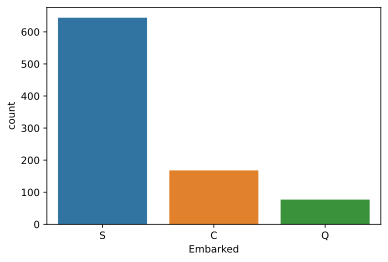

In [20]:
sns.countplot(x = data['Embarked'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

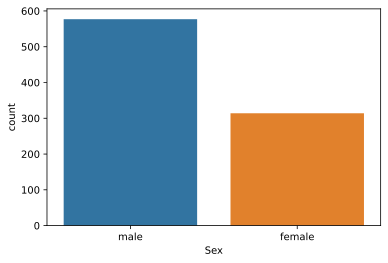

In [21]:
sns.countplot(x = data['Sex'])

In [22]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

## Correlation and Target Variable

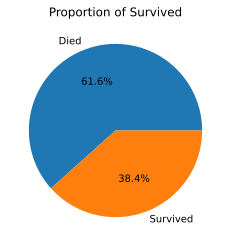

In [24]:
plt.pie(data['Survived'].value_counts(), labels = ['Died', 'Survived'], autopct = '%1.1f%%')
plt.title('Proportion of Survived')
plt.show()

<AxesSubplot:>

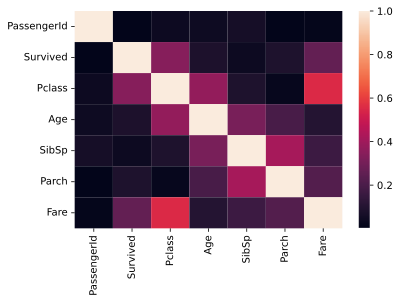

In [25]:
sns.heatmap(data.corr().abs())

### Categorical

In [26]:
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

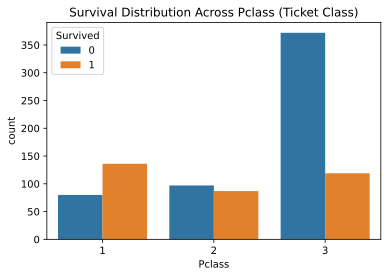

In [27]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])
plt.title('Survival Distribution Across Pclass (Ticket Class)')
plt.show()

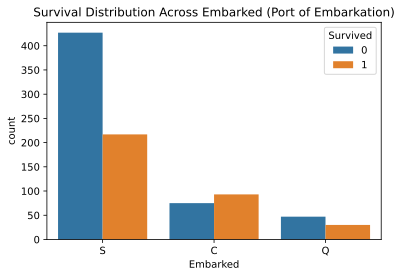

In [28]:
sns.countplot(x = data['Embarked'], hue = data['Survived'])
plt.title('Survival Distribution Across Embarked (Port of Embarkation)')
plt.show()

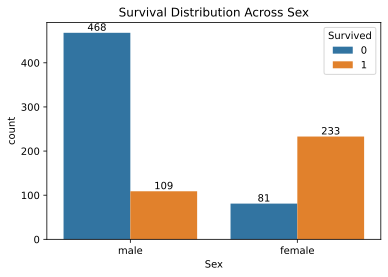

In [29]:
ax = sns.countplot(x = data['Sex'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Sex')
plt.show()   

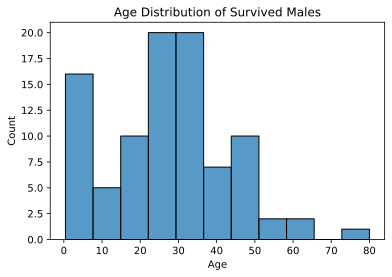

In [30]:
male = data[data['Sex'] == 'male']
survived_male_age = male[male['Survived'] == 1]['Age']
sns.histplot(x = survived_male_age)
plt.title('Age Distribution of Survived Males')
plt.show()

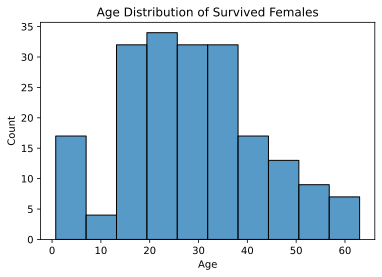

In [31]:
female = data[data['Sex'] == 'female']
survived_female_age = female[female['Survived'] == 1]['Age']
sns.histplot(x = survived_female_age)
plt.title('Age Distribution of Survived Females')
plt.show()

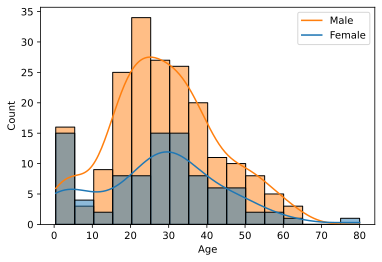

In [32]:
mf = pd.concat([survived_male_age, survived_female_age],ignore_index = True, axis = 1)
sns.histplot(data = mf, kde = True)
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.show()

### Numerical

In [33]:
numerical

['Age', 'Fare', 'SibSp', 'Parch']

(0.0, 600.0)

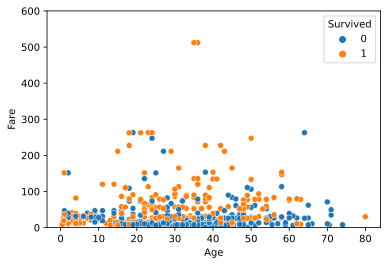

In [34]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Survived'] )
plt.ylim(0,600)

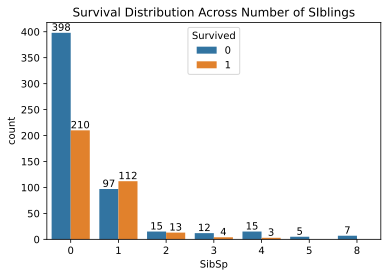

In [36]:
ax = sns.countplot(x = data['SibSp'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of SIblings')
plt.show()   

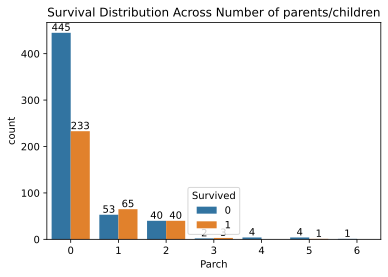

In [37]:
ax = sns.countplot(x = data['Parch'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of parents/children')
plt.show()   

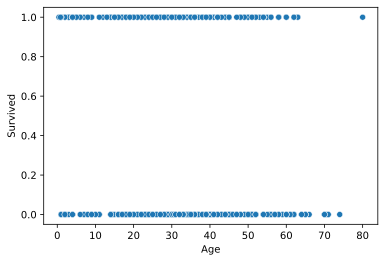

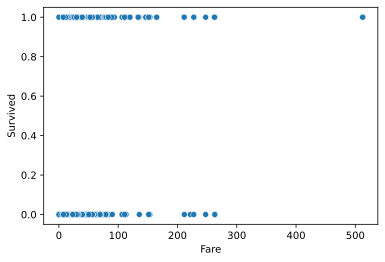

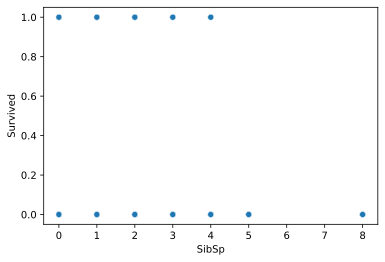

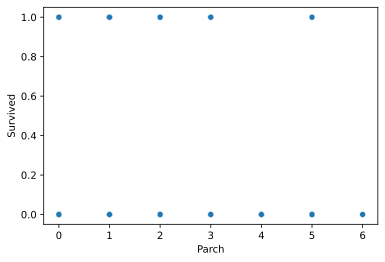

In [38]:
sns.scatterplot(x = data['Age'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Fare'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['SibSp'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Parch'], y = data['Survived'])
plt.show()

# Data Preprocessing

## Feature Engineering

In [39]:
data = data.drop(['PassengerId','Ticket', 'Cabin'], axis = 1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [40]:
test = test.drop(['PassengerId',  'Ticket', 'Cabin'], axis = 1)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


<font size="5">Name</font>

In [41]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

https://www.w3schools.com/python/python_regex.asp Regular expressions for Series.str.extract()
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html 

In [42]:
data['Title'] =  data['Name'].str.extract('([a-zA-Z]+)\.')
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [43]:
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [44]:
def title(name):
    if name == 'Mr':
        return 'Mr'
    elif name == 'Mrs':
        return 'Mrs'
    elif name == 'Miss':
        return 'Miss'
    elif name == 'Master':
        return 'Master'
    else:
        return 'Other'

In [45]:
data['Title'] = data['Title'].map(title)
test['Title'] = test['Title'].map(title)

In [46]:
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

In [47]:
data['Relatives'] = data['SibSp'] + data['Parch']
data = data.drop(['SibSp', 'Parch'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0


<AxesSubplot:xlabel='Relatives', ylabel='count'>

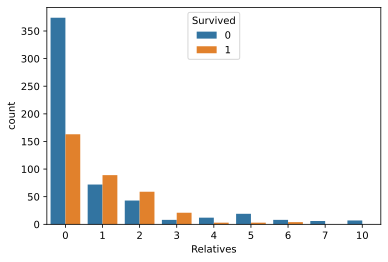

In [48]:
sns.countplot(x = data['Relatives'], hue = data['Survived'])

In [ ]:
# data.loc[data['Relatives'] == 0, 'Relatives'] = 0 # no relatives
# data.loc[data['Relatives'] > 0, 'Relatives'] = 1 # has relatives
# sns.countplot(x = data['Relatives'], hue = data['Survived'])

In [ ]:
# data.loc[data['Relatives']>=3, 'Relatives'] = 3

In [49]:
data['Relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relatives, dtype: int64

In [50]:
test['Relatives'] = test['SibSp'] + test['Parch']
test = test.drop(['SibSp', 'Parch'], axis = 1)

In [ ]:
# test.loc[data['Relatives'] == 0, 'Relatives'] = 0 # no relatives
# test.loc[data['Relatives'] > 0, 'Relatives'] = 1 # has relatives

In [ ]:
#test.loc[test['Relatives']>=3, 'Relatives'] = 3

In [ ]:
# data['Relatives'] = data['Relatives'].astype('O')
# test['Relatives'] = test['Relatives'].astype('O')

In [51]:
data['-Pclass'] = data['Pclass'].replace(3,99)
data['-Pclass'] = data['-Pclass'].replace(1,3)
data['-Pclass'] = data['-Pclass'].replace(99,1)
data['-Pclass*Fare'] = data['-Pclass'] * data['Fare']
data.drop('-Pclass', axis = 1, inplace = True)

In [52]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [53]:
test['-Pclass'] = test['Pclass'].replace(3,99)
test['-Pclass'] = test['-Pclass'].replace(1,3)
test['-Pclass'] = test['-Pclass'].replace(99,1)
test['-Pclass*Fare'] = test['-Pclass'] * test['Fare']
test.drop('-Pclass', axis = 1, inplace = True)

In [56]:
data['Fare/Person'] = data['Fare'] / (data['Relatives'] + 1 )
test['Fare/Person'] = test['Fare'] / (test['Relatives'] + 1 )

In [ ]:
log = ['Fare', '-Pclass*Fare', 'Fare/Person']
for col in log:
    data[col] = np.log(data[col] + 1)
    test[col] = np.log(test[col] + 1)

## Missing Values

In [57]:
data.isna().sum()

Survived          0
Pclass            0
Sex               0
Age             177
Fare              0
Embarked          2
Title             0
Relatives         0
-Pclass*Fare      0
Fare/Person       0
dtype: int64

In [58]:
test.isna().sum()

Pclass           0
Sex              0
Age             86
Fare             0
Embarked         0
Title            0
Relatives        0
-Pclass*Fare     0
Fare/Person      0
dtype: int64

<font size="5">Age</font>

In [59]:
data.corr()['Age'] 

Survived       -0.077221
Pclass         -0.369226
Age             1.000000
Fare            0.096067
Relatives      -0.301914
-Pclass*Fare    0.135288
Fare/Person     0.150763
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Title'>

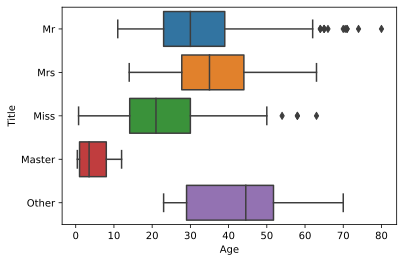

In [60]:
sns.boxplot(x = data['Age'], y = data['Title'])

In [61]:
data['Age'] = data['Age'].fillna(0)

In [62]:
for i in range(len(data)):
    if data.loc[i, 'Age'] == 0:
        median_value_by_title = data.groupby('Title').median()['Age'][data.loc[i,'Title']]
        data.loc[i,'Age'] =  median_value_by_title

In [63]:
test['Age'] = test['Age'].fillna(0)

In [64]:
for i in range(len(test)):
    if test.loc[i, 'Age'] == 0:
        median_value_by_title = test.groupby('Title').median()['Age'][test.loc[i,'Title']]
        test.loc[i,'Age'] =  median_value_by_title

In [65]:
# data['Age'] = data['Age'].fillna(data['Age'].median())
# test['Age'] = test['Age'].fillna(test['Age'].median())

In [66]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

### One hot Encoding

In [ ]:
# cat = ['Sex', 'Embarked', 'Pclass']
# num = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# ## lets try to encode only Embarked and Sex:
# cat = ['Sex', 'Embarked']
# num = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown = 'ignore')  # As discussed above, the handle_unknown is false because the model will see
#                                                         #new categories in the test dataset
# X_2 = encoder.fit_transform(X[cat]) # fit_transform to train data but only transform to test
# test_2 = encoder.transform(test[cat])

# X_encoded = pd.DataFrame(X_2.toarray())
# test_encoded = pd.DataFrame(test_2.toarray())
# X_encoded.set_index(X.index, inplace = True)
# test_encoded.set_index(test.index, inplace = True)

In [ ]:
# X = pd.concat([X[num], X_encoded], axis = 1)     # Concatenate numerical features with newly created onehotencoded 
# num_test = np.array(test.select_dtypes(include = ['float64', 'int64']).columns) # do the same for the test data.
# test = pd.concat([test[num], test_encoded], axis = 1)

In [ ]:
# X.head()

In [ ]:
# test.head()

### Get Dummies

In [67]:
data['Pclass'] = data['Pclass'].astype('O')
data = pd.get_dummies(data, prefix = ['Pclass', 'Sex', 'Embarked', 'Title'])
data.head()

,Survived,Age,Fare,Relatives,-Pclass*Fare,Fare/Person,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,22.0,7.2500,1,7.2500,3.62500,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,38.0,71.2833,1,213.8499,35.64165,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,7.9250,7.92500,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,53.1000,1,159.3000,26.55000,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,35.0,8.0500,0,8.0500,8.05000,0,0,1,0,1,0,0,1,0,0,1,0,0


In [68]:
test['Pclass'] = test['Pclass'].astype('O')
test = pd.get_dummies(test, prefix = ['Pclass', 'Sex', 'Embarked', 'Title'] )
test.head()

,Age,Fare,Relatives,-Pclass*Fare,Fare/Person,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,34.5,7.8292,0,7.8292,7.829200,0,0,1,0,1,0,1,0,0,0,1,0,0
1,47.0,7.0000,1,7.0000,3.500000,0,0,1,1,0,0,0,1,0,0,0,1,0
2,62.0,9.6875,0,19.3750,9.687500,0,1,0,0,1,0,1,0,0,0,1,0,0
3,27.0,8.6625,0,8.6625,8.662500,0,0,1,0,1,0,0,1,0,0,1,0,0
4,22.0,12.2875,2,12.2875,4.095833,0,0,1,1,0,0,0,1,0,0,0,1,0


### MinMaxScaling and TrainTestSplit

In [69]:
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [70]:
X.head()

,Age,Fare,Relatives,-Pclass*Fare,Fare/Person,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,22.0,7.2500,1,7.2500,3.62500,0,0,1,0,1,0,0,1,0,0,1,0,0
1,38.0,71.2833,1,213.8499,35.64165,1,0,0,1,0,1,0,0,0,0,0,1,0
2,26.0,7.9250,0,7.9250,7.92500,0,0,1,1,0,0,0,1,0,1,0,0,0
3,35.0,53.1000,1,159.3000,26.55000,1,0,0,1,0,0,0,1,0,0,0,1,0
4,35.0,8.0500,0,8.0500,8.05000,0,0,1,0,1,0,0,1,0,0,1,0,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

### Min Max Scaler

In [76]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

### Standard Scaler

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

In [85]:
X_train = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X.columns)
test = pd.DataFrame(test_scaled, columns = X.columns)

In [86]:
test

,Age,Fare,Relatives,-Pclass*Fare,Fare/Person,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.436386,-0.483107,-0.540607,-0.447318,-0.338860,-0.579513,-0.512261,0.921602,-0.719808,0.719808,-0.483703,3.357955,-1.639853,-0.227373,-0.501316,0.841091,-0.390005,-0.182707
1,1.361349,-0.499055,0.064601,-0.452495,-0.453220,-0.579513,-0.512261,0.921602,1.389259,-1.389259,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,-1.188932,2.564073,-0.182707
2,2.471304,-0.447366,-0.540607,-0.375234,-0.289771,-0.579513,1.952130,-1.085067,-0.719808,0.719808,-0.483703,3.357955,-1.639853,-0.227373,-0.501316,0.841091,-0.390005,-0.182707
3,-0.118592,-0.467080,-0.540607,-0.442115,-0.316848,-0.579513,-0.512261,0.921602,-0.719808,0.719808,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,0.841091,-0.390005,-0.182707
4,-0.488577,-0.397360,0.669808,-0.419483,-0.437480,-0.579513,-0.512261,0.921602,1.389259,-1.389259,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,-1.188932,2.564073,-0.182707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.266586,-0.478860,-0.540607,-0.445939,-0.333027,-0.579513,-0.512261,0.921602,-0.719808,0.719808,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,0.841091,-0.390005,-0.182707
414,0.769373,1.460803,-0.540607,1.543484,2.331013,1.725588,-0.512261,-1.085067,1.389259,-1.389259,2.067383,-0.297800,-1.639853,-0.227373,-0.501316,-1.188932,-0.390005,5.473255
415,0.732374,-0.494247,-0.540607,-0.450934,-0.354160,-0.579513,-0.512261,0.921602,-0.719808,0.719808,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,0.841091,-0.390005,-0.182707
416,-0.266586,-0.478860,-0.540607,-0.445939,-0.333027,-0.579513,-0.512261,0.921602,-0.719808,0.719808,-0.483703,-0.297800,0.609811,-0.227373,-0.501316,0.841091,-0.390005,-0.182707


# Model training

In [87]:
final = pd.read_csv('gender_submission.csv')
print(len(final))
final.head()

418


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Logistic Regression

In [89]:
logistic = SGDClassifier(loss = 'log', penalty = 'l2').fit(X_train, y_train)
print(logistic.score(X_train,y_train))
print(logistic.score(X_test,y_test))

final['Survived'] = logistic.predict(test)
final.to_csv('Final_Logistic.csv', index = False)

confusion_matrix(y_test, logistic.predict(X_test))

0.7893258426966292
0.8268156424581006


array([[89, 21],
       [10, 59]], dtype=int64)

### SVM

In [106]:
svm = SGDClassifier(loss = 'hinge', penalty = 'l2').fit(X_train, y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

final['Survived'] = svm.predict(test)
final.to_csv('Final_SVM.csv', index = False)

confusion_matrix(y_test, svm.predict(X_test))

0.7584269662921348
0.7988826815642458


array([[89, 21],
       [15, 54]], dtype=int64)

### Decision Tree

In [91]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 47).fit(X_train, y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

final['Survived'] = dt.predict(test)
final.to_csv('Final_DecisionTree.csv', index = False)

confusion_matrix(y_test, dt.predict(X_test))

0.827247191011236
0.8659217877094972


array([[97, 13],
       [11, 58]], dtype=int64)

### Random Forest

In [92]:
rf = RandomForestClassifier(max_depth = 3, random_state = 47).fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

final['Survived'] = rf.predict(test)
final.to_csv('Final_RandomForest.csv', index = False)

confusion_matrix(y_test, rf.predict(X_test))


0.8216292134831461
0.8491620111731844


array([[98, 12],
       [15, 54]], dtype=int64)

### knn


In [93]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

final['Survived'] = knn.predict(test)
final.to_csv('Final_KNN.csv', index = False)

confusion_matrix(y_test, knn.predict(X_test))

0.8595505617977528
0.8324022346368715


array([[97, 13],
       [17, 52]], dtype=int64)

### XGBoost

In [94]:
xgb = XGBClassifier().fit(X_train, y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

final['Survived'] = xgb.predict(test)
final.to_csv('Final_XGboost.csv', index = False)

confusion_matrix(y_test, xgb.predict(X_test))

0.976123595505618
0.8212290502793296


array([[92, 18],
       [14, 55]], dtype=int64)

### AdaBoost

In [95]:
adaboost = AdaBoostClassifier(n_estimators=200).fit(X_train, y_train)
print(adaboost.score(X_train,y_train))
print(adaboost.score(X_test,y_test))

final['Survived'] = adaboost.predict(test)
final.to_csv('Final_Adaboost.csv', index = False)

confusion_matrix(y_test, adaboost.predict(X_test))

0.8721910112359551
0.8603351955307262


array([[98, 12],
       [13, 56]], dtype=int64)

### LGMB

In [96]:
lgbm = LGBMClassifier().fit(X_train, y_train)
print(lgbm.score(X_train,y_train))
print(lgbm.score(X_test,y_test))

final['Survived'] = lgbm.predict(test)
final.to_csv('Final_LGBM.csv', index = False)

confusion_matrix(y_test, lgbm.predict(X_test))

0.9620786516853933
0.8659217877094972


array([[95, 15],
       [ 9, 60]], dtype=int64)

In [ ]:
# lgbm = LGBMClassifier(random_state=0)
# params = {
#     "boosting_type": ["gbdt", "dart", "goss"],
#     "learning_rate": [0.1, 0.05, 0.01],
#     "n_estimators": [10, 50, 100, 300]
# }
# clf = GridSearchCV(lgbm, params, cv=10)
# clf.fit(X_train, y_train)
# print("Best hyperparameter:", clf.best_params_)

In [101]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 
              'Random Forest', 'KNN', 'XGBoost', 
              'Adaboost', 
              'LGMB'],
    'Train_Acc': [logistic.score(X_train,y_train), svm.score(X_train,y_train), dt.score(X_train,y_train), 
              rf.score(X_train,y_train), knn.score(X_train,y_train), xgb.score(X_train,y_train), 
              adaboost.score(X_train,y_train), lgbm.score(X_train,y_train)],
    'Test_Acc' : [logistic.score(X_test,y_test), svm.score(X_test,y_test), dt.score(X_test,y_test), 
              rf.score(X_test,y_test), knn.score(X_test,y_test), xgb.score(X_test,y_test), 
              adaboost.score(X_test,y_test), lgbm.score(X_test,y_test)],
    'F1_Score' : [f1_score(logistic.predict(X_test),y_test), f1_score(svm.predict(X_test),y_test), f1_score(dt.predict(X_test),y_test), 
             f1_score(rf.predict(X_test),y_test), f1_score(knn.predict(X_test),y_test), f1_score(xgb.predict(X_test),y_test), 
              f1_score(adaboost.predict(X_test),y_test), f1_score(lgbm.predict(X_test),y_test)]
})

#result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
results

,Model,Train_Acc,Test_Acc,F1_Score
0,Logistic Regression,0.789326,0.826816,0.791946
1,Support Vector Machines,0.806180,0.832402,0.788732
2,Decision Tree,0.827247,0.865922,0.828571
3,Random Forest,0.821629,0.849162,0.800000
4,KNN,0.859551,0.832402,0.776119
5,XGBoost,0.976124,0.821229,0.774648
6,Adaboost,0.872191,0.860335,0.817518
7,LGMB,0.962079,0.865922,0.833333


## Cross Val

In [116]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(scaler, lgbm)
cross_val_score(clf, X, y, cv=10).mean()

0.8260549313358302

In [102]:
scores = cross_val_score(lgbm, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.87640449 0.75280899 0.85393258 0.84269663 0.84269663
 0.83146067 0.78651685 0.83146067 0.84269663]
Mean: 0.8238451935081148
Standard Deviation: 0.036621859972792915


## Parameter Tuning

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7],
    'criterion' :['gini', 'entropy']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 5)
CV_rf.fit(X_train, y_train)
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='entropy')
rfc1.fit(X_train, y_train)
print(rfc1.score(X_train,y_train))
print(rfc1.score(X_test,y_test))
confusion_matrix(y_test, rfc1.predict(X_test))
final['Survived'] = rfc1.predict(test_df)
final.to_csv('Final_rfc1.csv', index = False)

In [ ]:

params = {'max_leaf_nodes': [2,5,10,20,40,60,80], 
          'min_samples_split': [2, 3, 4],
         'criterion' : ['gini', 'entropy', 'log_loss'],
         'max_depth' : [3,5,7,10,15]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X, y)

In [ ]:
grid_search_cv.best_params_

In [ ]:
dt_gd = grid_search_cv.best_estimator_

In [ ]:
#dt = DecisionTreeClassifier(max_leaf_nodes = 16, min_samples_split = 2).fit(X_train, y_train)
print(dt_gd.score(X_train,y_train))
print(dt_gd.score(X_test,y_test))

In [ ]:
final['Survived'] = dt_gd.predict(test_df)
final.to_csv('Final_dt_gd.csv', index = False)